In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import datetime
import re
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib.pyplot import figure
from yellowbrick.cluster import KElbowVisualizer
from numpy import unique
from numpy import where
sns.set()

In [2]:
pd.set_option('display.max_columns', None)
df =pd.read_csv("marketing_campaign.csv", sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [3]:
df.columns = df.columns.str.lower()

## Exploratory data analysis (EDA)

In [4]:
df.shape

(2240, 29)

In [5]:
df.describe()

,id,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2240 non-null   int64  
 1   year_birth           2240 non-null   int64  
 2   education            2240 non-null   object 
 3   marital_status       2240 non-null   object 
 4   income               2216 non-null   float64
 5   kidhome              2240 non-null   int64  
 6   teenhome             2240 non-null   int64  
 7   dt_customer          2240 non-null   object 
 8   recency              2240 non-null   int64  
 9   mntwines             2240 non-null   int64  
 10  mntfruits            2240 non-null   int64  
 11  mntmeatproducts      2240 non-null   int64  
 12  mntfishproducts      2240 non-null   int64  
 13  mntsweetproducts     2240 non-null   int64  
 14  mntgoldprods         2240 non-null   int64  
 15  numdealspurchases    2240 non-null   i

## Finding null values

In [7]:
df.isna().sum()

id                      0
year_birth              0
education               0
marital_status          0
income                 24
kidhome                 0
teenhome                0
dt_customer             0
recency                 0
mntwines                0
mntfruits               0
mntmeatproducts         0
mntfishproducts         0
mntsweetproducts        0
mntgoldprods            0
numdealspurchases       0
numwebpurchases         0
numcatalogpurchases     0
numstorepurchases       0
numwebvisitsmonth       0
acceptedcmp3            0
acceptedcmp4            0
acceptedcmp5            0
acceptedcmp1            0
acceptedcmp2            0
complain                0
z_costcontact           0
z_revenue               0
response                0
dtype: int64

In [8]:
print("income mean: ", df.income.mean())
print("income median: ", df.income.median())

income mean:  52247.25135379061
income median:  51381.5


In [9]:
# Replacing the income median with missing values
df = df.fillna(df.income.mean())

## what data types do we have in this dataset

In [10]:
df.dtypes

id                       int64
year_birth               int64
education               object
marital_status          object
income                 float64
kidhome                  int64
teenhome                 int64
dt_customer             object
recency                  int64
mntwines                 int64
mntfruits                int64
mntmeatproducts          int64
mntfishproducts          int64
mntsweetproducts         int64
mntgoldprods             int64
numdealspurchases        int64
numwebpurchases          int64
numcatalogpurchases      int64
numstorepurchases        int64
numwebvisitsmonth        int64
acceptedcmp3             int64
acceptedcmp4             int64
acceptedcmp5             int64
acceptedcmp1             int64
acceptedcmp2             int64
complain                 int64
z_costcontact            int64
z_revenue                int64
response                 int64
dtype: object

In [11]:
# categorical columns
categorical =  df.select_dtypes(include=['object']).columns
categorical = list(categorical)
categorical

['education', 'marital_status', 'dt_customer']

In [12]:
# Numerical columns
numerical =  df.select_dtypes(exclude=['object']).columns
numerical = list(numerical)
numerical

['id',
 'year_birth',
 'income',
 'kidhome',
 'teenhome',
 'recency',
 'mntwines',
 'mntfruits',
 'mntmeatproducts',
 'mntfishproducts',
 'mntsweetproducts',
 'mntgoldprods',
 'numdealspurchases',
 'numwebpurchases',
 'numcatalogpurchases',
 'numstorepurchases',
 'numwebvisitsmonth',
 'acceptedcmp3',
 'acceptedcmp4',
 'acceptedcmp5',
 'acceptedcmp1',
 'acceptedcmp2',
 'complain',
 'z_costcontact',
 'z_revenue',
 'response']

In [13]:
# Unique categorical values
for i in df[categorical]:
    print(i , df[categorical][i].nunique())

education 5
marital_status 8
dt_customer 663


In [14]:
# Counting the number of different educational level
df.education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: education, dtype: int64

### I think we can regroup PHD, Master and Graduation in one group and 2n cycle and basic in another group!

In [15]:
df.education = df.education.replace(['PhD','Graduation', 'Master'], 'fully_Graduated')

df.education = df.education.replace(['Basic', '2n Cycle'], 'under_Graduated')

In [16]:
education = df.education.value_counts()
education

fully_Graduated    1983
under_Graduated     257
Name: education, dtype: int64

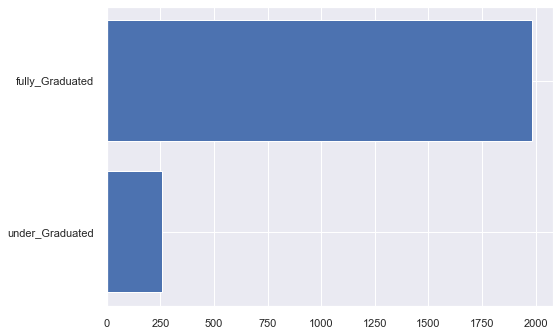

In [17]:
# Plotting the educaiton levels
fig , ax = plt.subplots()
ax.barh(education.keys(), education.values)
ax.invert_yaxis()
plt.show()


In [18]:
# Counting the number of different marital status
df.marital_status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: marital_status, dtype: int64

### Here I want to regroup married and together in one group and the rest in another group

In [19]:
df.marital_status = df.marital_status.replace(['Married','Together'], 'Partner')

df.marital_status = df.marital_status.replace(['Single','Divorced', 'Widow', 'Alone','Absurd', 'YOLO'], 'Single')

In [20]:
m_status = df.marital_status.value_counts()
m_status

Partner    1444
Single      796
Name: marital_status, dtype: int64

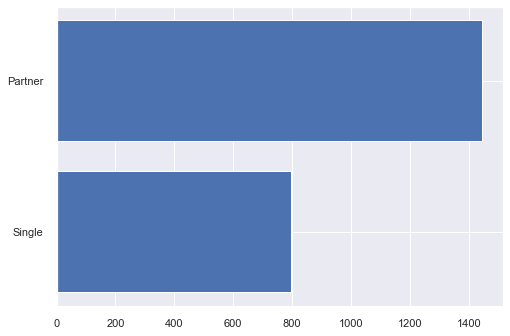

In [21]:
# Plotting the educaiton levels
fig , ax = plt.subplots()
ax.barh(m_status.keys(), m_status.values)
ax.invert_yaxis()
plt.show()


## Getting some information from the dataset

In [22]:
# age of the customer
df['age'] = (pd.Timestamp('now').year) - df['year_birth'] 

# drop year_birth after getting the age
df = df.drop('year_birth', axis=1)

In [23]:
df.columns

Index(['id', 'education', 'marital_status', 'income', 'kidhome', 'teenhome',
       'dt_customer', 'recency', 'mntwines', 'mntfruits', 'mntmeatproducts',
       'mntfishproducts', 'mntsweetproducts', 'mntgoldprods',
       'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases',
       'numstorepurchases', 'numwebvisitsmonth', 'acceptedcmp3',
       'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1', 'acceptedcmp2',
       'complain', 'z_costcontact', 'z_revenue', 'response', 'age'],
      dtype='object')

In [24]:
# for how long a customer has been enrolled using 
# : Dt_Customer: Date of customer's enrollment with the company 

def enrolment_period(dts):
    today = datetime.date.today()
    en_date = pd.to_datetime(dts).date() 
    days = today - en_date
    days = re.sub(" days, 0:00:00", "", str(days))
    days = int(days)
    return days


df['enrolment_days'] = df.dt_customer.apply(enrolment_period)

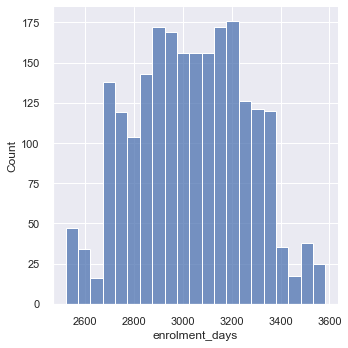

In [25]:
# Plotting the enrollment day of the customers
sns.displot(df["enrolment_days"])
plt.show()

### Lets check the income's distribution

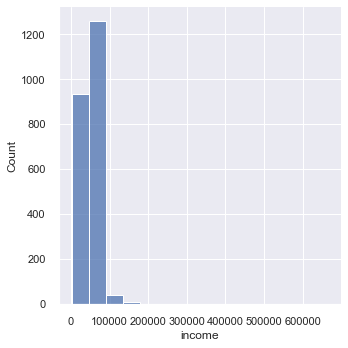

In [26]:
sns.displot(df["income"], bins = 15 )
plt.show()

In [27]:
df = df[df['income']< 200000]
df.shape

(2239, 30)

## Products: regrouping the products in 3 categories :
## category_1: meats = meat & fish
## category_2: other_products: wine & sweets & fruits
## and I left gold alone

In [28]:
df['meats'] = df['mntmeatproducts'] + df['mntfishproducts']

df['other_products'] = df['mntsweetproducts'] + df['mntwines']+  df['mntfruits']

df.rename(columns = ({'mntgoldprods':'gold'}), inplace = True)

In [29]:
df.columns

Index(['id', 'education', 'marital_status', 'income', 'kidhome', 'teenhome',
       'dt_customer', 'recency', 'mntwines', 'mntfruits', 'mntmeatproducts',
       'mntfishproducts', 'mntsweetproducts', 'gold', 'numdealspurchases',
       'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases',
       'numwebvisitsmonth', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5',
       'acceptedcmp1', 'acceptedcmp2', 'complain', 'z_costcontact',
       'z_revenue', 'response', 'age', 'enrolment_days', 'meats',
       'other_products'],
      dtype='object')

## Reducing dimentions

In [30]:
drop_list = ['id', 'dt_customer', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts']

In [31]:
df.drop(drop_list, axis = 1,inplace = True)

### Responses to the campaines in a column: 

In [32]:
responces = ['acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
             'acceptedcmp2', 'response']


df['responces'] = df[responces].sum(axis = 1)

# if there is any responses it would be 1 otherwise it would be 0
def mapp(num):
    if num >=1:
        result = 1
    else:
        result = 0
    return result


df['responces'] = df['responces'].apply(mapp)

In [33]:
# check if it works!
df['responces'].unique()

array([1, 0], dtype=int64)

In [34]:
# Dropping all those columns (dimensionality reduction)
df.drop(responces, axis = 1,inplace = True)

### Regroup puraches

In [35]:
purchases = ['numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases']

# Adding all the purchases in one column
df['purchases'] = df[purchases].sum(axis = 1) 
# Removing the other columns
df.drop(purchases, axis = 1,inplace = True)

### Regroup teen and kids

In [36]:
# Combining the two columns kidhome and teenhome in one column
teen_kids = ['kidhome', 'teenhome']
# The number of children in teen_kids
df['teen_kids'] = df[teen_kids].sum(axis = 1)
# Dropping those columns 
df.drop(teen_kids, axis = 1,inplace = True)


In [37]:
# new numerical values after dimensionality reduction
numerical_n =  df.select_dtypes(exclude=['object']).columns
numerical_n = list(numerical_n)
numerical_n

['income',
 'recency',
 'gold',
 'numwebvisitsmonth',
 'complain',
 'z_costcontact',
 'z_revenue',
 'age',
 'enrolment_days',
 'meats',
 'other_products',
 'responces',
 'purchases',
 'teen_kids']

In [38]:
# Control the number of unique vaues in numericals
df[numerical_n].nunique()

income               1974
recency               100
gold                  213
numwebvisitsmonth      16
complain                2
z_costcontact           1
z_revenue               1
age                    59
enrolment_days        663
meats                 606
other_products        857
responces               2
purchases              39
teen_kids               4
dtype: int64

In [39]:
#z_costcontact and z_revenue only have one value lets inspect them
print(df['z_costcontact'].unique())
print(df['z_revenue'].unique())

[3]
[11]


In [40]:
# as these unique values can not affect our model we can drop these columns
df = df.drop(columns = ['z_costcontact','z_revenue' ], axis = 1)
df.shape

(2239, 14)

In [41]:
# Looking into the age coulmn
df.age.unique()

array([ 64,  67,  56,  37,  40,  54,  50,  36,  47,  71,  38,  45,  62,
        69,  34,  75,  41,  72,  39,  42,  70,  52,  35,  32,  58,  51,
        48,  78,  46,  25,  53,  57,  44,  43,  66,  55,  33,  73,  63,
        49,  61,  76,  30,  59,  68,  60,  65,  29, 121, 128,  31,  74,
       122,  28,  27,  80,  77,  26,  81], dtype=int64)

In [42]:
# Replacing the age with the age groups

def age_category(age):
    if  25<=age <= 35:
        age = 0
    elif 35 < age <= 45:
        age = 1
    elif 45 < age <= 55:
        age = 2
    elif 55 < age <= 65:
        age = 3
    elif 65 < age <= 75:
        age = 4
    elif age > 75:  
        age = 5
    return age  

df.age = df.age.apply(age_category)
df.age.unique()

array([3, 4, 1, 2, 0, 5], dtype=int64)

In [43]:
age_groups = df.age.value_counts()
age_groups

2    685
1    505
3    492
4    341
0    189
5     27
Name: age, dtype: int64

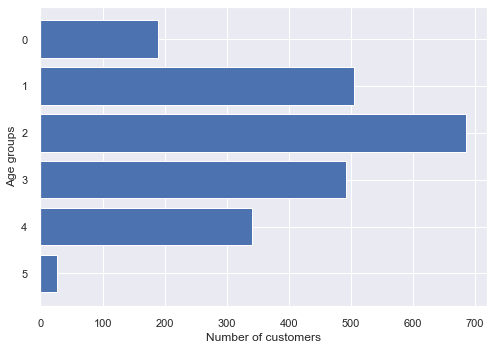

In [44]:
# Plotting the educaiton levels
fig , ax = plt.subplots()
ax.barh(age_groups.keys(), age_groups.values)
ax.invert_yaxis()
plt.xlabel('Number of customers')
plt.ylabel('Age groups')
plt.show()


In [45]:
# the latest version of the dataset
df.head()

,education,marital_status,income,recency,gold,numwebvisitsmonth,complain,age,enrolment_days,meats,other_products,responces,purchases,teen_kids
0,fully_Graduated,Single,58138.0,58,88,7,0,3,3492,718,811,1,25,0
1,fully_Graduated,Single,46344.0,38,6,5,0,4,2646,8,13,0,6,2
2,fully_Graduated,Partner,71613.0,26,42,4,0,3,2993,238,496,0,21,0
3,fully_Graduated,Partner,26646.0,26,5,6,0,1,2586,30,18,0,8,1
4,fully_Graduated,Partner,58293.0,94,15,5,0,1,2842,164,243,0,19,1


<AxesSubplot:>

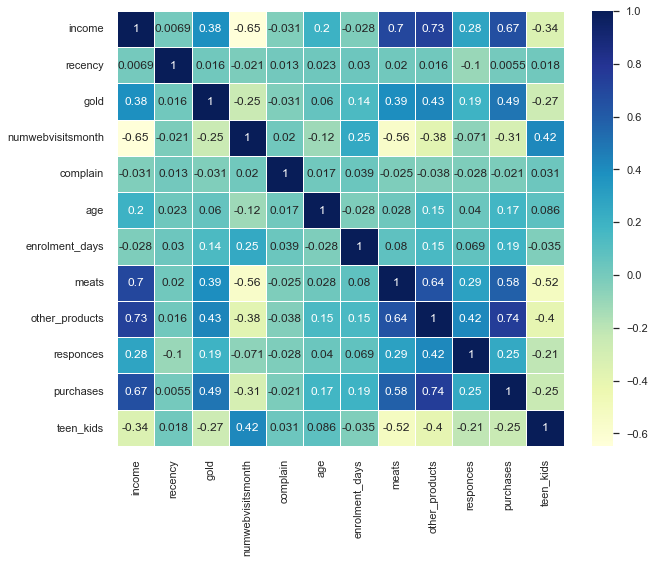

In [46]:
# Plotting the heat map to investigate relationship of the columns within the dataframe
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True,cmap = 'YlGnBu',linewidths=1)

## Looking into the heat map it is clear that Columns with the nature of cost, such as gold, meat, purchases and other products have a higher correlation with the income

In [47]:
# the laterst numerical values after dimensionality reduction
final_numerical =   df.select_dtypes(exclude=['object']).columns
final_numerical =  list(final_numerical )
final_numerical 

['income',
 'recency',
 'gold',
 'numwebvisitsmonth',
 'complain',
 'age',
 'enrolment_days',
 'meats',
 'other_products',
 'responces',
 'purchases',
 'teen_kids']

In [48]:
# the laterst categorical values after dimensionality reduction
final_categorical =   df.select_dtypes(include=['object']).columns
final_categorical =  list(final_categorical )
final_categorical 

['education', 'marital_status']

## One-Hot encoding

In [49]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[feature_to_encode])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop(feature_to_encode, axis=1)
    return(res)


df_encoded = encode_and_bind(df,final_categorical)

In [50]:
df_encoded.head()

,income,recency,gold,numwebvisitsmonth,complain,age,enrolment_days,meats,other_products,responces,purchases,teen_kids,education_fully_Graduated,education_under_Graduated,marital_status_Partner,marital_status_Single
0,58138.0,58,88,7,0,3,3492,718,811,1,25,0,1,0,0,1
1,46344.0,38,6,5,0,4,2646,8,13,0,6,2,1,0,0,1
2,71613.0,26,42,4,0,3,2993,238,496,0,21,0,1,0,1,0
3,26646.0,26,5,6,0,1,2586,30,18,0,8,1,1,0,1,0
4,58293.0,94,15,5,0,1,2842,164,243,0,19,1,1,0,1,0


In [51]:
df_encoded.nunique()

income                       1974
recency                       100
gold                          213
numwebvisitsmonth              16
complain                        2
age                             6
enrolment_days                663
meats                         606
other_products                857
responces                       2
purchases                      39
teen_kids                       4
education_fully_Graduated       2
education_under_Graduated       2
marital_status_Partner          2
marital_status_Single           2
dtype: int64

In [52]:
df_encoded['expences'] = df_encoded[['meats','gold','other_products']].sum(axis = 1)

df_encoded = df_encoded.drop(['meats','gold','other_products'],axis = 1)

## Scaling the data

In [53]:
from sklearn.preprocessing import StandardScaler
to_scale = ['income', 'recency', 'numwebvisitsmonth','enrolment_days', 'expences','purchases' ]
sc = StandardScaler()
X_scaled = sc.fit_transform(df_encoded[to_scale])


In [54]:
# the laterst numerical values after dimensionality reduction
final_numerical =   df.select_dtypes(exclude=['object']).columns
final_numerical =  list(final_numerical )
final_numerical 

['income',
 'recency',
 'gold',
 'numwebvisitsmonth',
 'complain',
 'age',
 'enrolment_days',
 'meats',
 'other_products',
 'responces',
 'purchases',
 'teen_kids']

In [55]:
df_scaled = pd.DataFrame(X_scaled, columns=to_scale)
df_scaled

,income,recency,numwebvisitsmonth,enrolment_days,expences,purchases
0,0.288013,0.306624,0.693887,1.976802,1.678944,1.320381
1,-0.262958,-0.384051,-0.130311,-1.666507,-0.961639,-1.154628
2,0.917515,-0.798456,-0.542410,-0.172147,0.282258,0.799327
3,-1.183175,-0.798456,0.281788,-1.924897,-0.918460,-0.894101
4,0.295254,1.549838,-0.130311,-0.822430,-0.305645,0.538799
...,...,...,...,...,...,...
2234,0.432133,-0.107781,-0.130311,0.125002,1.220579,0.408536
2235,0.562518,0.237556,0.693887,-1.942123,-0.269109,0.929590
2236,0.233963,1.446237,0.281788,-0.848269,1.054505,0.538799
2237,0.806891,-1.420063,-0.954509,-0.843963,0.393528,1.059854


In [56]:
df_final = pd.concat([df_encoded.drop(to_scale, axis=1), df_scaled], axis=1)
df_final.head()

,complain,age,responces,teen_kids,education_fully_Graduated,education_under_Graduated,marital_status_Partner,marital_status_Single,income,recency,numwebvisitsmonth,enrolment_days,expences,purchases
0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,1.0,0.288013,0.306624,0.693887,1.976802,1.678944,1.320381
1,0.0,4.0,0.0,2.0,1.0,0.0,0.0,1.0,-0.262958,-0.384051,-0.130311,-1.666507,-0.961639,-1.154628
2,0.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0,0.917515,-0.798456,-0.542410,-0.172147,0.282258,0.799327
3,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,-1.183175,-0.798456,0.281788,-1.924897,-0.918460,-0.894101
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.295254,1.549838,-0.130311,-0.822430,-0.305645,0.538799


In [57]:
df_final.dropna(inplace = True)

## K-means for clustering

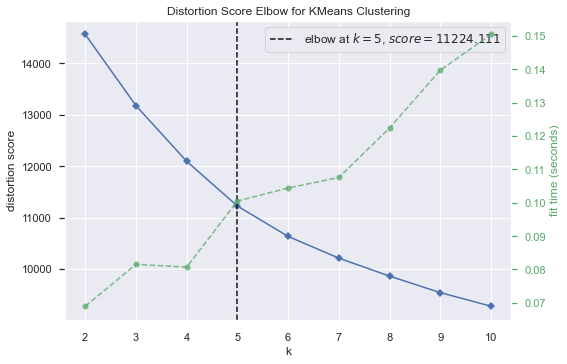

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [58]:

model = KMeans(init = 'k-means++')
visualizer = KElbowVisualizer(model, k = 10, random_state = 42)

visualizer.fit(df_final)
visualizer.show()

### The result indicates that we have 4 clusters 

In [65]:
kmeans = KMeans(n_clusters=3, max_iter=2000, algorithm = 'auto')
fitted = kmeans.fit(df_final)
prediction = kmeans.predict(df_final)
df_final['Cluster'] = prediction+1

### I tried with both 4 and 3 clusters and 3 makes more sense!

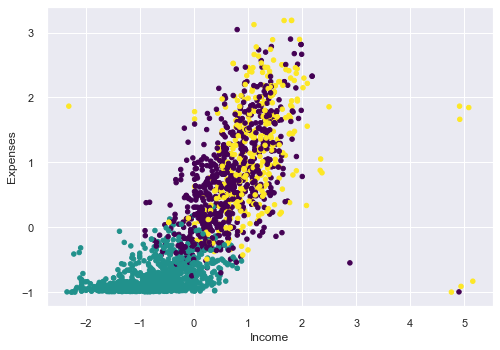

In [66]:
plt.scatter(x=df_final["income"], y=df_final["expences"],
            c=df_final["Cluster"], s = 20 , cmap='viridis')
            
plt.xlabel('Income')
plt.ylabel('Expenses')
plt.show()

In [61]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

## Lets try another clustering method: 

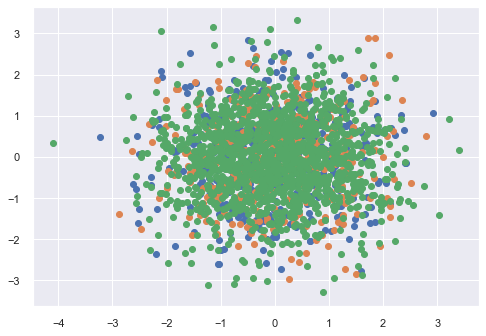

In [62]:
# birch clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import Birch

# define dataset
X, _ = make_classification(n_samples=df_final.shape[0], n_features=df_final.shape[1], n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = Birch(threshold=0.01, n_clusters=3)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(df_final)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()

### The result does not look like a good clustering! so K-means whould be a better choice. I also tried Spectral Clustering and Optics. not acceptable clustering!